In [17]:
# Import librarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

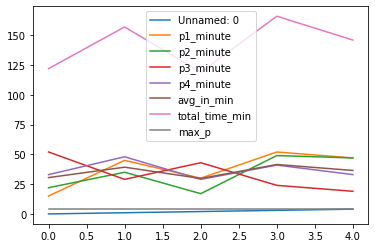

In [2]:
# Load the dataset
df = pd.read_csv('src/data/wait_time.csv')

# View the dataset
df.plot()

**Data Cleaning and preprocessing**
    ***-Drop the date column***

In [3]:
df.drop(['p1', 'p2', 'p3', 'p4', 'total_time_min', 'max_p', 'Unnamed: 0'], axis=1, inplace=True)


In [4]:
df

,doctor,p1_minute,p2_minute,p3_minute,p4_minute,avg_in_min
0,d1,15,22,52,33,30.50
1,d2,45,35,29,48,39.25
2,d3,30,17,43,29,29.75
3,d4,52,49,24,41,41.50
4,d5,47,47,19,33,36.50


In [5]:
# Sum the total time a doctor spent with a patient
total_min = df[['p1_minute', 'p2_minute', 'p3_minute', 'p4_minute']].sum(axis=1)

In [6]:
# view total minute
total_min

0    122
1    157
2    119
3    166
4    146
dtype: int64

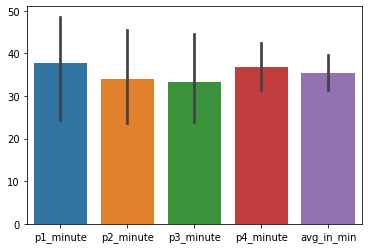

In [7]:
sns.barplot(data=df)

In [8]:
# Building the model 
reg_model = linear_model.LinearRegression()

# Training the model
reg_model.fit(df[['p1_minute', 'p2_minute', 'p3_minute', 'p4_minute']], df.avg_in_min)

LinearRegression()

In [9]:
# The cofficient of the prediction
reg_model.coef_

array([0.25, 0.25, 0.25, 0.25])

In [10]:
# The intercept of the prediction
reg_model.intercept_

0.0

In [11]:
# Testing the model 
avg_time = reg_model.predict([[15,58,32,25]])
# view the average time
avg_time[0]

32.50000000000001

In [34]:
# total number of patient a doctor can atten to in a given time 
total_p_schedule = total_min/avg_time[0]
total_p_schedule
fig = plt.figure(figsize=(12,8))
plt.barplot(total_p_schedule)
plt.ylabel('Annual Total Sales', color='red')
plt.xlabel('Year', color='red')
plt.legend(['Sales', 'Forecast']) 
# imgdata = StringIO()
# fig.savefig(imgdata, format='svg')
# imgdata.seek(0)
# graph = imgdata.getvalue()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Figure size 864x576 with 0 Axes>

In [13]:
# Calculate patient waiting time 
p_waiting_time = avg_time[0] + 50

p_waiting_time

82.5